In [379]:
import pandapower as pp
import matplotlib.pyplot as plt
from pandas import DataFrame


In [380]:
#create empty net
net = pp.create_empty_network() 

In [381]:
#create buses
b1 = pp.create_bus(net, vn_kv=220., name="Bus 1")
b2 = pp.create_bus(net, vn_kv=220., name="Bus 2")
b3 = pp.create_bus(net, vn_kv=220., name="Bus 3")

In [382]:
pp.create_line_from_parameters(net, from_bus=b1, to_bus=b2, length_km=46., 
                               name="Line 1-2", r_ohm_per_km= 0.005, x_ohm_per_km=0.00, 
                               c_nf_per_km=14., max_i_ka=2.);  

In [383]:
pp.create_load(net, bus=b2, p_mw=10., q_mvar=10., name="Load");

In [384]:
pp.create_ext_grid(net, bus=b1, vm_pu=1.0, name="Grid Connection");

In [385]:
# run power flow
pp.runpp(net)

In [386]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,10.000599,0.208247,-10.0,-10.0,0.000599,-9.791753,0.02625,0.037115,0.037115,1.0,0.0,0.999952,0.00139,1.855762


In [387]:
net.res_ext_grid

,p_mw,q_mvar
0,10.000599,0.208247


**TODO:**
1. Vary the reactance (ohms/km), capacitance (nano-Farads/km) and length of the line (km) to find the sweet spot such that the net reactive power (Q) from the line equals zero
2. Vary the voltage (vm_pu) of the external grid between 0.95 and 1.05. What is the effect on the reactive power (Q) required from the external grid

In [388]:
Data = {'Voltage':[0.95,0.96,0.97,0.98,0.99,1.0,1.1,1.2,1.3,1.4,1.5], 'Q reactive power required from grid':[1.162988,0.975957,0.78696,0.596019,0.403112,0.208247, -1.848119,-4.100329,-6.548384,-9.192283,-12.032027]}

In [389]:
df = DataFrame(Data,columns=['Voltage','Q reactive power required from grid'])
print(df)

    Voltage  Q reactive power required from grid
0      0.95                             1.162988
1      0.96                             0.975957
2      0.97                             0.786960
3      0.98                             0.596019
4      0.99                             0.403112
5      1.00                             0.208247
6      1.10                            -1.848119
7      1.20                            -4.100329
8      1.30                            -6.548384
9      1.40                            -9.192283
10     1.50                           -12.032027


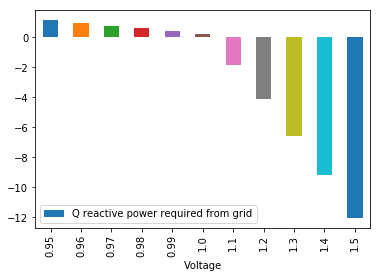

In [390]:
df.plot(x ='Voltage', y='Q reactive power required from grid', kind = 'bar')